In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np

In [120]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [50]:
data = pd.read_excel('AB_Test_Results.xlsx')
data.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [52]:
data.shape

(10000, 3)

In [53]:
data.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [54]:
data.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

In [62]:
data[data['REVENUE'] > 0]

,USER_ID,VARIANT_NAME,REVENUE
13,2529,variant,2.15
49,6429,control,3.25
139,3331,variant,4.27
149,8110,variant,1.75
152,8607,control,2.99
...,...,...,...
9651,9928,variant,1.25
9711,6468,control,2.93
9724,5205,control,14.17
9725,702,variant,2.92


In [82]:
data.VARIANT_NAME.value_counts()

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64

In [61]:
data[data['VARIANT_NAME'] == 'variant'].describe()

,USER_ID,REVENUE
count,5016.000000,5016.000000
mean,4972.776914,0.070070
std,2876.320625,1.314802
min,3.000000,0.000000
25%,2476.500000,0.000000
50%,4958.500000,0.000000
75%,7415.250000,0.000000
max,10000.000000,58.630000


In [63]:
data[data['VARIANT_NAME'] == 'control'].describe()

,USER_ID,REVENUE
count,4984.000000,4984.000000
mean,4989.436798,0.129013
std,2905.145109,3.007524
min,2.000000,0.000000
25%,2466.000000,0.000000
50%,4964.500000,0.000000
75%,7576.250000,0.000000
max,10000.000000,196.010000


В контрольной группе средний и максимальный чеки выше, чем в тестируемой

In [84]:
v = data.\
    groupby('USER_ID', as_index=False).\
    agg({'VARIANT_NAME': pd.Series.nunique})
v.head(10)

,USER_ID,VARIANT_NAME
0,2,1
1,3,2
2,4,1
3,5,1
4,6,1
5,9,1
6,10,2
7,11,1
8,12,1
9,13,1


In [108]:
print(variants.head())

variant    5016
control    4984
Name: VARIANT_NAME, dtype: int64


In [113]:
data.shape

(10000, 3)

In [114]:
cont = data.query('VARIANT_NAME == "control"')
test = data.query('VARIANT_NAME == "variant"')

In [116]:
len(cont)

4984

In [117]:
len(test)

5016

In [118]:
from scipy.stats import shapiro

In [121]:
alpha = 0.05

st = shapiro(data.REVENUE)
print('Distribution is {}normal\n'.format( {True:'not ',
False:''}[st[1] < alpha]));

Distribution is not normal



In [ ]:
cont.REVENUE.hist(bins = 25, alpha = 0.7, label = 'Control')
test.REVENUE.hist(bins = 25, alpha = 0.7, label = 'Test')
plt.title('Доход на юзера по группам')
plt.xlabel('Доход')
plt.ylabel('Число пользователей')
plt.legend();

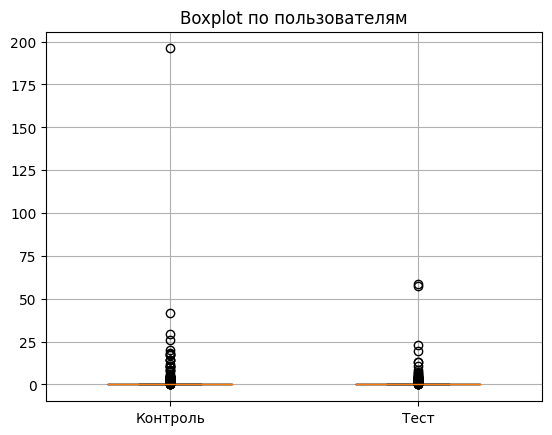

In [128]:
plt.boxplot([cont.REVENUE,test.REVENUE],
            labels=['Контроль','Тест'],
            widths=0.5
           )
plt.title('Boxplot по пользователям',  loc='center')
plt.grid(axis  ='both')

In [130]:
ttest_ind(cont.REVENUE.values, test.REVENUE.values, equal_var = False)

Ttest_indResult(statistic=1.268403803110966, pvalue=0.20469713432410774)

In [131]:
C_mean = cont.REVENUE.values.mean()
T_mean = test.REVENUE.values.mean()
C_std = cont.REVENUE.values.std()
T_std = test.REVENUE.values.std()

In [132]:
print(len(cont.REVENUE.values), len(test.REVENUE.values))

4984 5016


In [133]:
n =  len(cont.REVENUE.values)

In [135]:
S = np.sqrt((T_std**2 + C_std **2)/ 2)

In [136]:
ef =float((T_mean-C_mean)/ S) 

In [149]:
from statsmodels.stats.power import TTestIndPower


alpha = 0.05
effect = 0.02

analysis = TTestIndPower()
result = analysis.solve_power(effect, power = None,
nobs1 = n, ratio = 1.0, alpha = alpha)

result

0.16965671280283606

Рекомендация менеджеру: необходимо проверить корректность проделанного эксперимента и не выкатывать обновление в продакшн.